# problem statement

finding a gmail/message is spam or not spam based on the contents like rare words, repetition of common spam email words etc

target --> email/message is spam or not spam

In [1]:
import pandas as pd

In [2]:
path = r"E:\coding\CSV\spam or not spam\completeSpamAssassin.csv"

df = pd.read_csv(path)
df

,Unnamed: 0,Body,Label
0,0,\nSave up to 70% on Life Insurance.\nWhy Spend...,1
1,1,1) Fight The Risk of Cancer!\nhttp://www.adcli...,1
2,2,1) Fight The Risk of Cancer!\nhttp://www.adcli...,1
3,3,##############################################...,1
4,4,I thought you might like these:\n1) Slim Down ...,1
...,...,...,...
6041,6041,empty,0
6042,6042,___ ___ ...,0
6043,6043,IN THIS ISSUE:01. Readers write\n02. Extension...,0
6044,6044,empty,0


In [3]:
df.rename(columns={"Label" : "spam"}, inplace=True)
df.drop(columns=["Unnamed: 0"], inplace=True)
df.dropna(inplace=True)
df

,Body,spam
0,\nSave up to 70% on Life Insurance.\nWhy Spend...,1
1,1) Fight The Risk of Cancer!\nhttp://www.adcli...,1
2,1) Fight The Risk of Cancer!\nhttp://www.adcli...,1
3,##############################################...,1
4,I thought you might like these:\n1) Slim Down ...,1
...,...,...
6041,empty,0
6042,___ ___ ...,0
6043,IN THIS ISSUE:01. Readers write\n02. Extension...,0
6044,empty,0


In [4]:
print(df.spam.value_counts())

spam
0    4150
1    1895
Name: count, dtype: int64


In [5]:
# feature = df[["Body"]].values
# # target = df[["Label"]]

# feature

In [6]:
df.Body

0       \nSave up to 70% on Life Insurance.\nWhy Spend...
1       1) Fight The Risk of Cancer!\nhttp://www.adcli...
2       1) Fight The Risk of Cancer!\nhttp://www.adcli...
3       ##############################################...
4       I thought you might like these:\n1) Slim Down ...
                              ...                        
6041                                                empty
6042                      ___           ___           ...
6043    IN THIS ISSUE:01. Readers write\n02. Extension...
6044                                                empty
6045                                                empty
Name: Body, Length: 6045, dtype: object

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.Body, df.spam, test_size=0.20)

In [8]:
from sklearn.feature_extraction.text import CountVectorizer

v = CountVectorizer()

X_train_count = v.fit_transform(X_train)

X_train_count.toarray()[:3]

array([[ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [10,  0,  0, ...,  0,  0,  0]], dtype=int64)

In [9]:
from sklearn.naive_bayes import MultinomialNB

nb_model = MultinomialNB()
nb_model.fit(X_train_count, y_train)

MultinomialNB()

# SCORE

In [10]:
X_test_count = v.transform(X_test)

nb_model.score(X_test_count, y_test)

0.946236559139785

# -----------------------------------------------------------------------------

## using pipeline to simplify the process of using CountVectorizer and then multinomialNB

In [11]:
from sklearn.pipeline import Pipeline

clf = Pipeline([
    ("v2", CountVectorizer()),
    ("nb_model2", MultinomialNB())
])

In [12]:
clf.fit(X_train, y_train)

Pipeline(steps=[('v2', CountVectorizer()), ('nb_model2', MultinomialNB())])

In [13]:
clf.score(X_test, y_test)

0.946236559139785

In [14]:
emails = [
    "Pursuing certification offers a triad of benefits: it equips you with career-boosting skills, underscores your commitment to learning, and enhances your CV's value by showcasing your documented expertise.",
    "Dear yash raj suman, This is in reference to your application for Student loan Registration no : 4085957 Transaction has been successful to beneficiary DAV INSTITUTE OF ENGINEERING AND TECHNOL for the amount Rs. 150000.0 with UTR No N131232456476245 on 11-MAY-23. In case of any discrepancy in the amount sent to college/yourself, kindly send an email to trxn.bsefcl@gmail.com within 3 working days so that appropriate action can be taken. It shall be assumed that the amount transferred is appropriate in case there is no objection raised within 3 working days from the receipt of this Email. Please mention your registration Id in any communication. Regards, BSEFCL.",
    "U must have got mail regarding coca cola ,Do as it is saying ,U can try its up to u,Quiz will last till 8PM"
]

In [15]:
clf.predict(emails)

array([1, 1, 0], dtype=int64)

In [16]:
import matplotlib.pyplot as plt
from sklearn import metrics


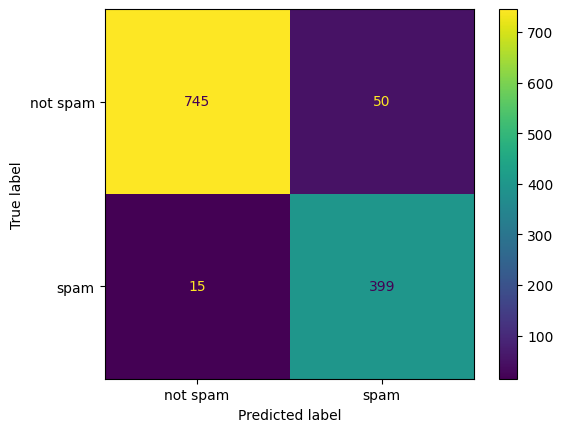

In [19]:
actual = y_test
predicted = clf.predict(X_test)

confusion_matrix = metrics.confusion_matrix(actual, predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ["not spam", "spam"])

cm_display.plot()
plt.show()

In [18]:
y_test.value_counts()

spam
0    795
1    414
Name: count, dtype: int64